In [1]:
! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed  # Import ThreadPoolExecutor

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Step 1: Load tickers from a CSV file
tickers_df = pd.read_csv('Tickers.csv')  # Ensure this file contains updated tickers
tickers = tickers_df['Ticker'].tolist()  # Adjust based on the column name in your CSV

In [5]:
tickers

['RELIANCE.NS',
 'TCS.NS',
 'INFY.BO',
 'HDFCBANK.BO',
 'ICICIBANK.BO',
 'ADANIPOWER.BO',
 'APOLLOHOSP.BO',
 'HEROMOTOCO.BO',
 'MARUTI.BO',
 'BHARTIARTL.NS']

In [6]:
start_date = "2014-09-30"
end_date = "2024-09-30"
# Download historical data for each ticker without specifying date range
stock_data = yf.download(tickers, start=start_date, end=end_date)  # 'max' retrieves the maximum available data
stock_data = stock_data.stack(level=1).reset_index()
# Rename columns to make it more clear
stock_data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


[*********************100%***********************]  10 of 10 completed


In [7]:
stock_data.head()

Date         Ticker         Open         High  \
0 2014-09-30 00:00:00+00:00  ADANIPOWER.BO    43.400002    43.400002   
1 2014-09-30 00:00:00+00:00  APOLLOHOSP.BO  1082.020142  1120.650024   
2 2014-09-30 00:00:00+00:00  BHARTIARTL.NS   346.858643   365.189453   
3 2014-09-30 00:00:00+00:00    HDFCBANK.BO   388.320587   435.750000   
4 2014-09-30 00:00:00+00:00  HEROMOTOCO.BO  2133.363770  2842.050049   

           Low        Close    Adj Close     Volume  
0    45.200001    43.200001    44.400002   848909.0  
1  1134.000000  1089.750000  1091.650024    14555.0  
2   368.569153   361.404175   363.432007  4148252.0  
3   440.000000   431.000000   432.500000   986976.0  
4  2920.000000  2825.300049  2865.000000    48106.0

In [8]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2463
RELIANCE.NS      2463
TCS.NS           2463
HDFCBANK.BO      2441
INFY.BO          2441
MARUTI.BO        2439
ADANIPOWER.BO    2438
APOLLOHOSP.BO    2438
HEROMOTOCO.BO    2438
ICICIBANK.BO     2438
Name: Ticker, dtype: int64

In [9]:
stock_data.tail()

Date        Ticker          Open          High  \
24457 2024-09-27 00:00:00+00:00  ICICIBANK.BO   1306.500000   1306.500000   
24458 2024-09-27 00:00:00+00:00       INFY.BO   1885.739136   1907.199951   
24459 2024-09-27 00:00:00+00:00     MARUTI.BO  13497.349609  13497.349609   
24460 2024-09-27 00:00:00+00:00   RELIANCE.NS   1526.175049   1526.175049   
24461 2024-09-27 00:00:00+00:00        TCS.NS   4298.214355   4308.700195   

                Low         Close     Adj Close      Volume  
24457   1332.000000   1303.050049   1331.400024    218203.0  
24458   1974.650024   1903.300049   1930.000000    262993.0  
24459  13539.849609  13275.049805  13409.750000     25239.0  
24460   1533.474976   1492.000000   1499.000000  20597478.0  
24461   4378.000000   4300.049805   4335.000000   3012477.0

In [10]:
# View dimensions of dataset   
rows, col = stock_data.shape
print ("Dimensions of dataset: {}" . format (stock_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (24462, 8)
Rows: 24462 
Columns: 8


In [11]:
# Dtype
print(f'The data type contains:\n object --> {stock_data.dtypes.value_counts()[1]}\n float64 --> {stock_data.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24462 entries, 0 to 24461
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       24462 non-null  datetime64[ns, UTC]
 1   Ticker     24462 non-null  object             
 2   Open       24462 non-null  float64            
 3   High       24462 non-null  float64            
 4   Low        24462 non-null  float64            
 5   Close      24462 non-null  float64            
 6   Adj Close  24462 non-null  float64            
 7   Volume     24462 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 1.5+ MB


In [13]:
float_cols = stock_data.columns.drop(["Ticker","Date"])
stock_data[float_cols] = stock_data[float_cols].round().astype("Int64")
stock_data.head()

Date         Ticker  Open  High   Low  Close  \
0 2014-09-30 00:00:00+00:00  ADANIPOWER.BO    43    43    45     43   
1 2014-09-30 00:00:00+00:00  APOLLOHOSP.BO  1082  1121  1134   1090   
2 2014-09-30 00:00:00+00:00  BHARTIARTL.NS   347   365   369    361   
3 2014-09-30 00:00:00+00:00    HDFCBANK.BO   388   436   440    431   
4 2014-09-30 00:00:00+00:00  HEROMOTOCO.BO  2133  2842  2920   2825   

   Adj Close   Volume  
0         44   848909  
1       1092    14555  
2        363  4148252  
3        432   986976  
4       2865    48106

In [14]:
stock_data.sort_values(by="Date").head()

Date         Ticker  Open  High   Low  Close  \
0 2014-09-30 00:00:00+00:00  ADANIPOWER.BO    43    43    45     43   
1 2014-09-30 00:00:00+00:00  APOLLOHOSP.BO  1082  1121  1134   1090   
2 2014-09-30 00:00:00+00:00  BHARTIARTL.NS   347   365   369    361   
3 2014-09-30 00:00:00+00:00    HDFCBANK.BO   388   436   440    431   
4 2014-09-30 00:00:00+00:00  HEROMOTOCO.BO  2133  2842  2920   2825   

   Adj Close   Volume  
0         44   848909  
1       1092    14555  
2        363  4148252  
3        432   986976  
4       2865    48106

In [1]:
stock_data1 = stock_data[(stock_data['Ticker'] == 'RELIANCE.NS')]    
stock_data1.head()

NameError: name 'stock_data' is not defined

In [16]:
# View dimensions of dataset   
rows, col = stock_data1.shape
print ("Dimensions of dataset: {}" . format (stock_data1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2463, 8)
Rows: 2463 
Columns: 8


In [17]:
# Dtype
print(f'The data type contains:\n object --> {stock_data1.dtypes.value_counts()[1]}\n float64 --> {stock_data1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [18]:
stock_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 8 to 24460
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       2463 non-null   datetime64[ns, UTC]
 1   Ticker     2463 non-null   object             
 2   Open       2463 non-null   Int64              
 3   High       2463 non-null   Int64              
 4   Low        2463 non-null   Int64              
 5   Close      2463 non-null   Int64              
 6   Adj Close  2463 non-null   Int64              
 7   Volume     2463 non-null   Int64              
dtypes: Int64(6), datetime64[ns, UTC](1), object(1)
memory usage: 187.6+ KB


In [19]:
stock_data2 = stock_data1.copy()

In [20]:
# Dtype
print(f'The data type contains:\n object --> {stock_data2.dtypes.value_counts()[1]}\n int64 --> {stock_data2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [21]:
stock_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 8 to 24460
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       2463 non-null   datetime64[ns, UTC]
 1   Ticker     2463 non-null   object             
 2   Open       2463 non-null   Int64              
 3   High       2463 non-null   Int64              
 4   Low        2463 non-null   Int64              
 5   Close      2463 non-null   Int64              
 6   Adj Close  2463 non-null   Int64              
 7   Volume     2463 non-null   Int64              
dtypes: Int64(6), datetime64[ns, UTC](1), object(1)
memory usage: 187.6+ KB


In [22]:
stock_data2.sort_values(by="Date").head()

Date       Ticker  Open  High  Low  Close  Adj Close  \
8  2014-09-30 00:00:00+00:00  RELIANCE.NS   194   216  217    211        212   
18 2014-10-01 00:00:00+00:00  RELIANCE.NS   191   212  216    212        216   
28 2014-10-07 00:00:00+00:00  RELIANCE.NS   190   212  214    211        212   
38 2014-10-08 00:00:00+00:00  RELIANCE.NS   192   214  215    211        211   
48 2014-10-09 00:00:00+00:00  RELIANCE.NS   196   218  219    214        214   

      Volume  
8   17642155  
18   8656245  
28  12404189  
38   9827783  
48  11164671

In [23]:
# Plotting count plot by year
Year = stock_data2['Date'].dt.year

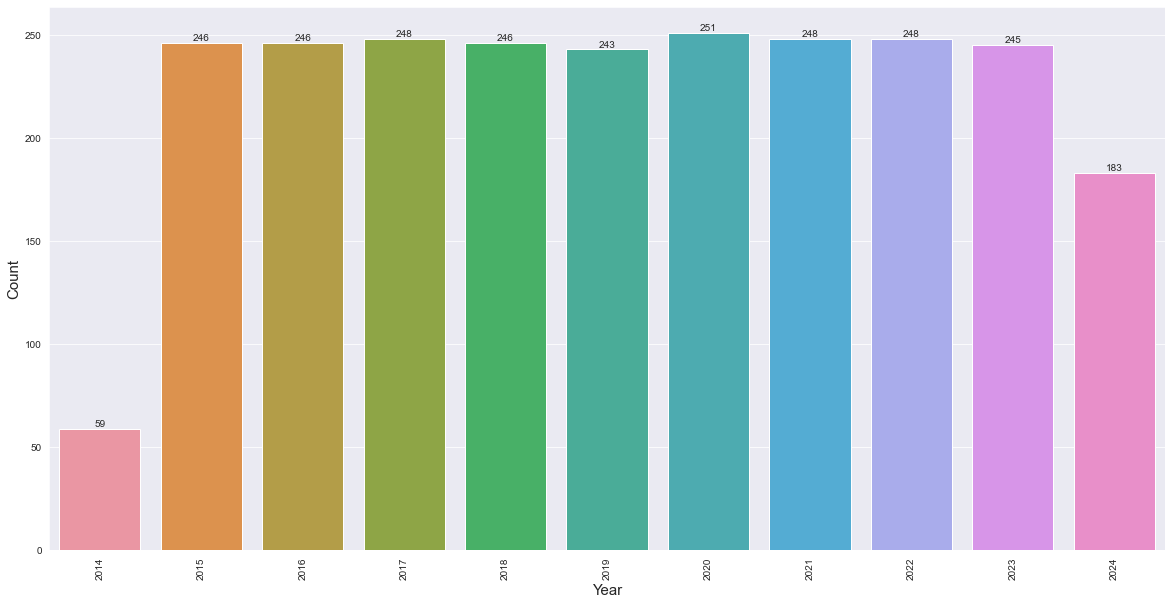

In [24]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data2, x=Year)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Identify the labels (index) of rows where the year is 2014
labels_to_drop = stock_data2[stock_data2['Date'].dt.year == 2014].index

# Drop the rows corresponding to 2014 using the labels
stock_data3 = stock_data2.drop(labels=labels_to_drop, axis=0)

In [26]:
stock_data.head()

Date         Ticker  Open  High   Low  Close  \
0 2014-09-30 00:00:00+00:00  ADANIPOWER.BO    43    43    45     43   
1 2014-09-30 00:00:00+00:00  APOLLOHOSP.BO  1082  1121  1134   1090   
2 2014-09-30 00:00:00+00:00  BHARTIARTL.NS   347   365   369    361   
3 2014-09-30 00:00:00+00:00    HDFCBANK.BO   388   436   440    431   
4 2014-09-30 00:00:00+00:00  HEROMOTOCO.BO  2133  2842  2920   2825   

   Adj Close   Volume  
0         44   848909  
1       1092    14555  
2        363  4148252  
3        432   986976  
4       2865    48106

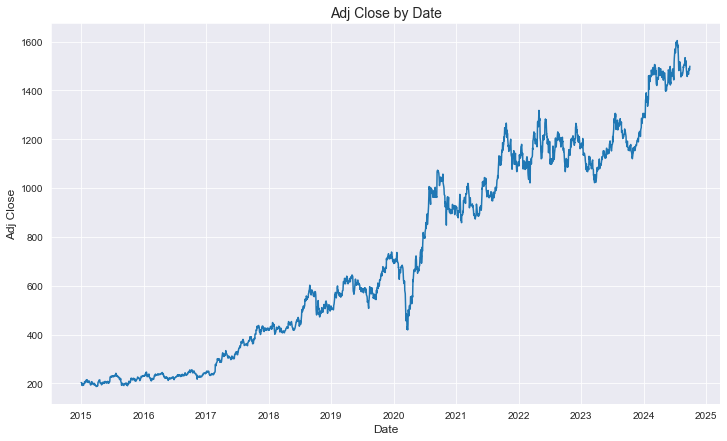

In [27]:
# Plotting the target-date linear graph
plt.figure(figsize=(12, 7))
sns.lineplot(data=stock_data3, x="Date", y="Adj Close")
plt.title("Adj Close by Date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adj Close", fontsize=12)
plt.grid(True)
plt.show()

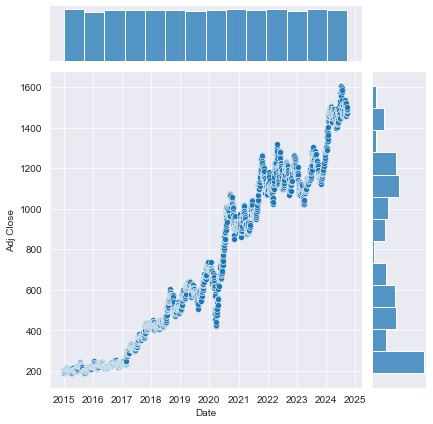

In [28]:
# Target-Date
sns.jointplot(data=stock_data3, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

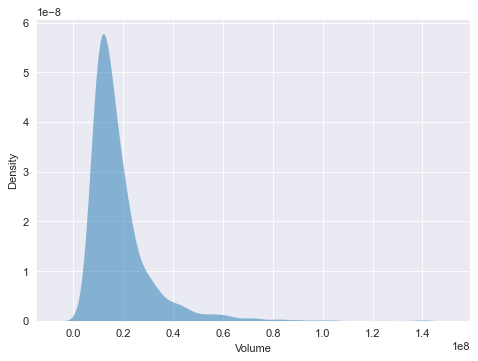

In [29]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=stock_data3, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [30]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [31]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

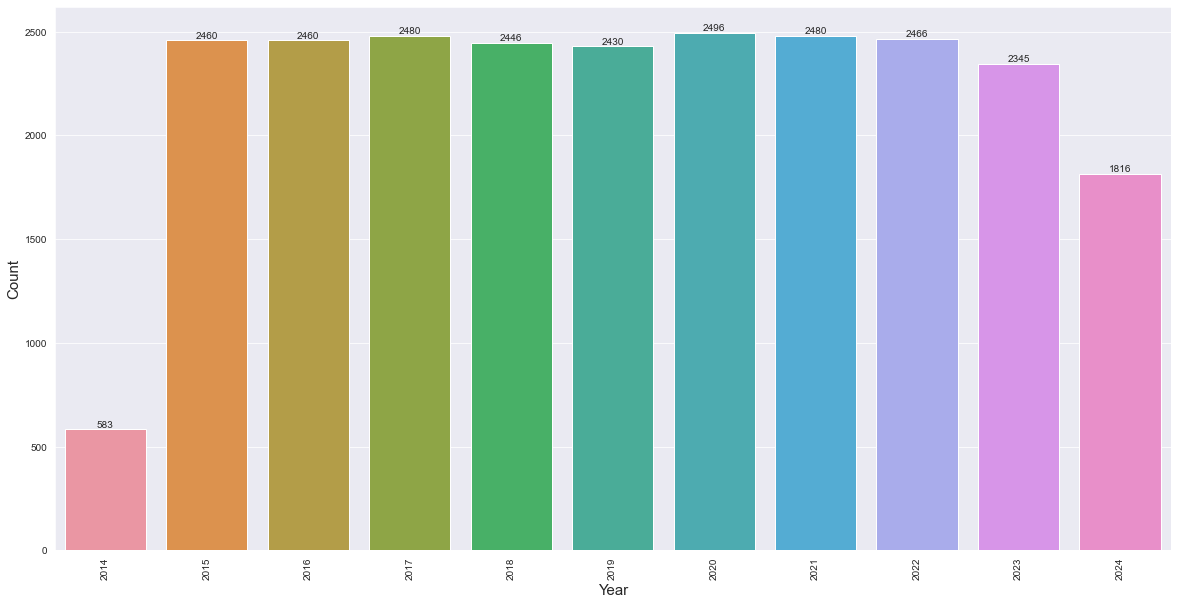

In [32]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [33]:
# Identify the labels (index) of rows where the year is 2014
labels_to_drop = stock_data[stock_data['Date'].dt.year == 2014].index

# Drop the rows corresponding to 2014 using the labels
stock_data = stock_data.drop(labels=labels_to_drop, axis=0)

In [34]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

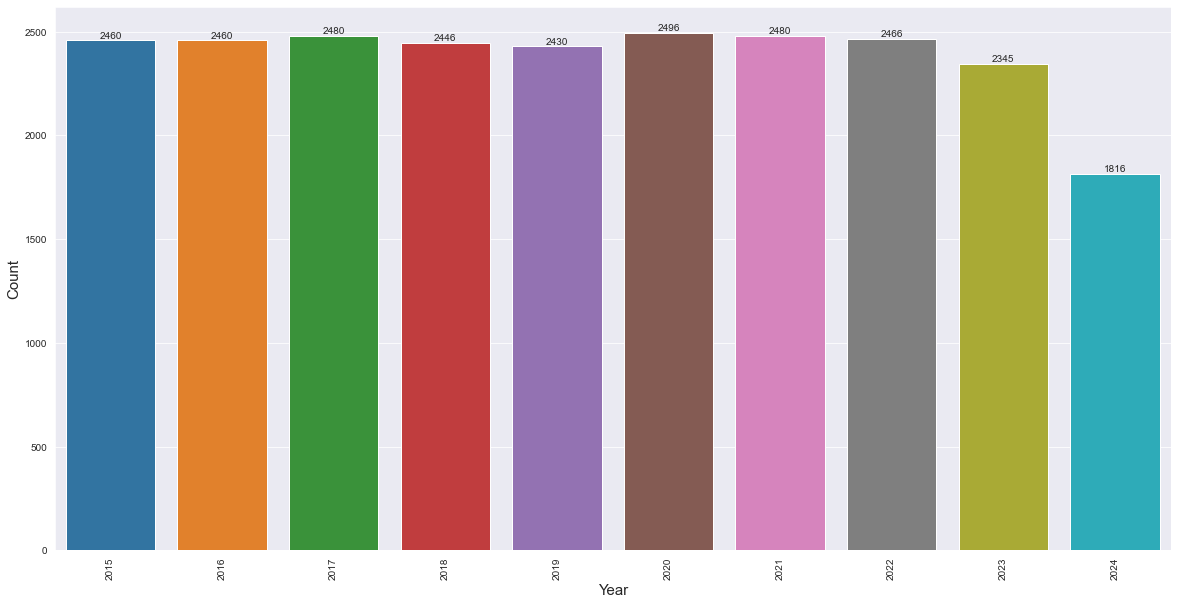

In [35]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [36]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The min value of ",i," is ",stock_data[i].min())

The min value of  Open  is  15
The min value of  High  is  15
The min value of  Low  is  16
The min value of  Close  is  15
The min value of  Adj Close  is  16
The min value of  Volume  is  964


In [37]:
column=stock_data['Ticker']
column
# Check for problematic values in the 'Close' column
print(stock_data['Close'].value_counts())

30       117
27        91
29        86
28        80
36        65
        ... 
9109       1
3896       1
4020       1
5618       1
13275      1
Name: Close, Length: 5815, dtype: Int64


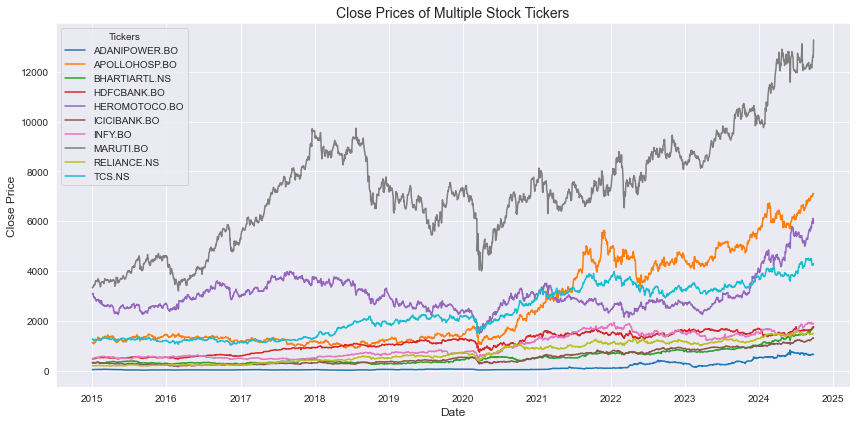

In [38]:
# Pivot data for plotting
pivot_df = stock_data.pivot(index='Date', columns='Ticker', values='Close')
# Convert the Int datatype to Float datatype
pivot_df = pivot_df.astype(float)
# Fill NaN values in pivot_df with an appropriate method
pivot_df = pivot_df.ffill()  # Forward fill
# OR
pivot_df = pivot_df.fillna(0)  # Replace NaN with 0 (if valid)
# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
import numpy as np
# Replace close prices in the range 0-100 with NaN
col=stock_data.columns.drop(['Ticker','Date'])
for val in col:
    stock_data.loc[(stock_data[val] > 0) & (stock_data[val] <= 100), val] = np.nan

In [40]:
columns_no_varience = []
for col in stock_data.columns:
    if len(stock_data[col].unique()) ==1:
        columns_no_varience.append(col)
        stock_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (stock_data.shape)

[]
(23879, 8)


In [41]:
duplicate_rows = stock_data.duplicated()
print(duplicate_rows.any())
stock_data.drop_duplicates(inplace = True)
print(stock_data.shape)

False
(23879, 8)


In [42]:
## Checking For Duplicated Rows in Data
stock_data.duplicated().sum()

0

In [43]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', stock_data[column].skew())

Skewness of Open before outlier treatment:  2.1097698935960194
Skewness of High before outlier treatment:  1.9993607242455373
Skewness of Close before outlier treatment:  2.001427845713017
Skewness of Low before outlier treatment:  1.995548729229545
Skewness of Adj Close before outlier treatment:  1.9989379582533018


In [44]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Maximum value in', column, 'before outlier treatment: ', stock_data[column].max())

Maximum value in Open before outlier treatment:  13497
Maximum value in High before outlier treatment:  13497
Maximum value in Close before outlier treatment:  13275
Maximum value in Low before outlier treatment:  13675
Maximum value in Adj Close before outlier treatment:  13410


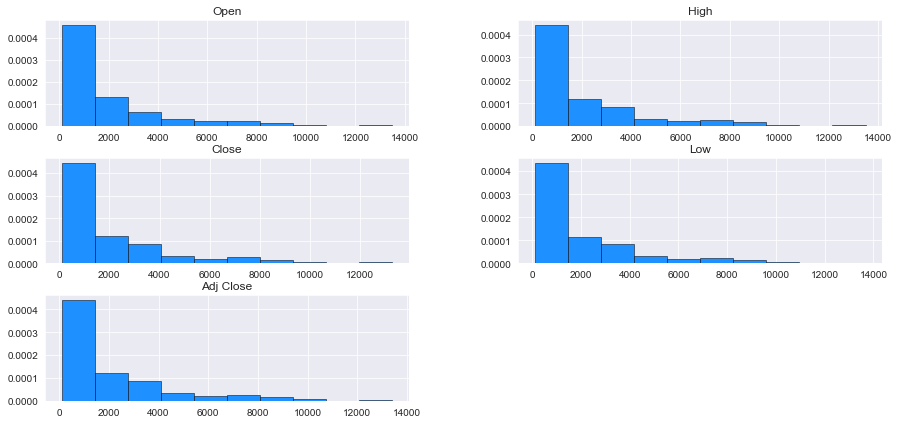

In [45]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

In [46]:
stock_data.isnull().sum()

Date            0
Ticker          0
Open         1634
High         1634
Low          1607
Close        1657
Adj Close    1628
Volume          0
dtype: int64

In [47]:
print('Percentage of Missing values:')
print('-----------------------------')
stock_data.isnull().sum()/len(stock_data)*100

Percentage of Missing values:
-----------------------------


Date         0.000000
Ticker       0.000000
Open         6.842833
High         6.842833
Low          6.729763
Close        6.939152
Adj Close    6.817706
Volume       0.000000
dtype: float64

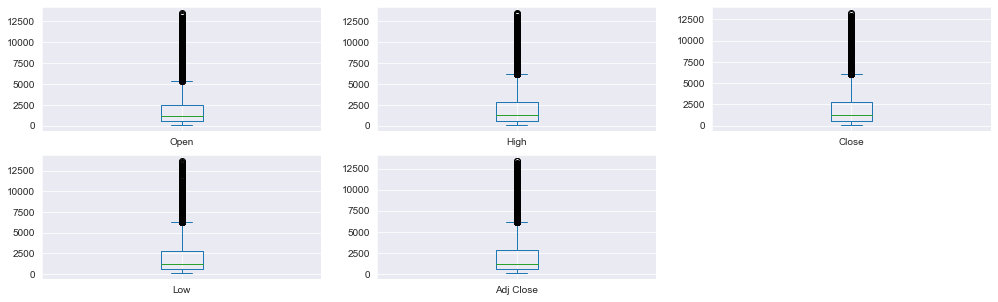

In [48]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [49]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)
    Q3 = stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Drop NaN values before comparison
    column_data = stock_data[column].dropna()
    outliers = [x for x in column_data if x < lower or x > upper]

    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*' * 40)

Open
Identified outliers: 2101
****************************************
High
Identified outliers: 1821
****************************************
Close
Identified outliers: 1819
****************************************
Low
Identified outliers: 1811
****************************************
Adj Close
Identified outliers: 1814
****************************************


In [50]:
stock_data['Open'].isna().sum()

1634

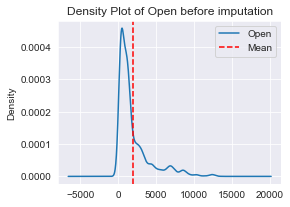

In [51]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [52]:
Skewness_of_Open_with_missing_values = stock_data['Open'].skew()

In [53]:
stock_data['Open']=stock_data.groupby(['Date'], group_keys=False)['Open'].apply(lambda x:x.fillna(x.median()))
stock_data['Open'].isna().sum()

0

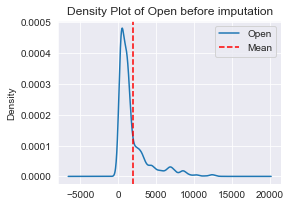

In [54]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [55]:
stock_data['Close'].isna().sum()

1657

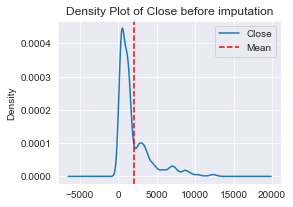

In [56]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close before imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [57]:
stock_data['Close']=stock_data.groupby(['Date'], group_keys=False)['Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Close'].isna().sum()

0

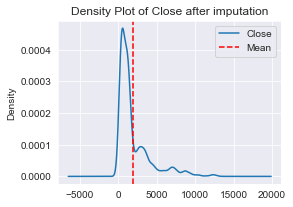

In [58]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close after imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [59]:
stock_data['Low'].isna().sum()

1607

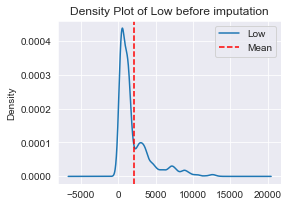

In [60]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low before imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [61]:
stock_data['Low']=stock_data.groupby(['Date'], group_keys=False)['Low'].apply(lambda x:x.fillna(x.median()))
stock_data['Low'].isna().sum()

0

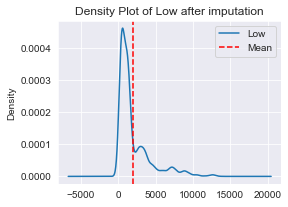

In [62]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low after imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [63]:
stock_data['High'].isna().sum()

1634

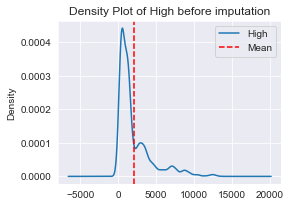

In [64]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [65]:
stock_data['High']=stock_data.groupby(['Date'], group_keys=False)['High'].apply(lambda x:x.fillna(x.median()))
stock_data['High'].isna().sum()

0

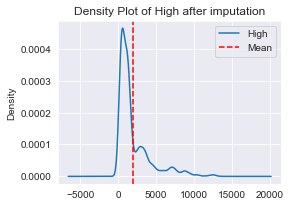

In [66]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High after imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [67]:
stock_data['Adj Close'].isna().sum()

1628

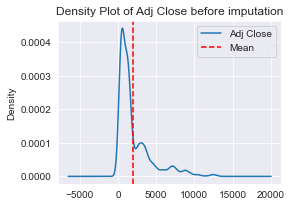

In [68]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [69]:
stock_data['Adj Close']=stock_data.groupby(['Date'], group_keys=False)['Adj Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Adj Close'].isna().sum()

0

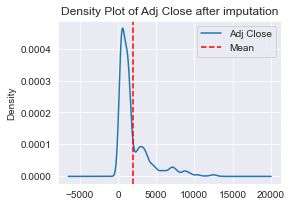

In [70]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close after imputation')
plt.axvline(x=stock_data['Adj Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

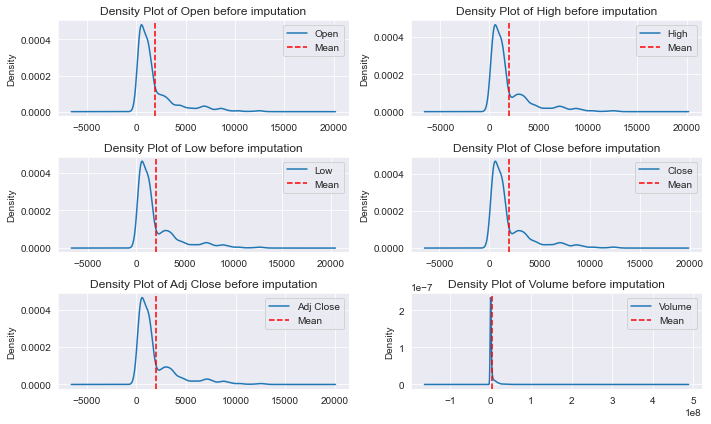

In [71]:
# Exclude unwanted columns
col = stock_data.columns.drop(['Ticker', 'Date'])

# Number of plots per row
plots_per_row = 2

# Initialize subplots
fig, axes = plt.subplots(nrows=(len(col) + 1) // plots_per_row, ncols=plots_per_row, figsize=(10, 6))
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, i in enumerate(col):
    stock_data[i].plot(kind='density', ax=axes[idx], figsize=(10, 6))
    axes[idx].set_title(f'Density Plot of {i} before imputation')
    axes[idx].axvline(x=stock_data[i].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].legend()

# Hide unused axes (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [72]:
# Pivot data for plotting
pivot_df1 = stock_data.pivot(index='Date', columns='Ticker', values='Close')
pivot_df1.dtypes

Ticker
ADANIPOWER.BO    Int64
APOLLOHOSP.BO    Int64
BHARTIARTL.NS    Int64
HDFCBANK.BO      Int64
HEROMOTOCO.BO    Int64
ICICIBANK.BO     Int64
INFY.BO          Int64
MARUTI.BO        Int64
RELIANCE.NS      Int64
TCS.NS           Int64
dtype: object

In [73]:
pivot_df1 = pivot_df1.astype(float)
pivot_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2404 entries, 2015-01-01 00:00:00+00:00 to 2024-09-27 00:00:00+00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADANIPOWER.BO  2380 non-null   float64
 1   APOLLOHOSP.BO  2380 non-null   float64
 2   BHARTIARTL.NS  2404 non-null   float64
 3   HDFCBANK.BO    2383 non-null   float64
 4   HEROMOTOCO.BO  2380 non-null   float64
 5   ICICIBANK.BO   2380 non-null   float64
 6   INFY.BO        2383 non-null   float64
 7   MARUTI.BO      2381 non-null   float64
 8   RELIANCE.NS    2404 non-null   float64
 9   TCS.NS         2404 non-null   float64
dtypes: float64(10)
memory usage: 206.6 KB


In [74]:
pivot_df1.isnull().sum()

Ticker
ADANIPOWER.BO    24
APOLLOHOSP.BO    24
BHARTIARTL.NS     0
HDFCBANK.BO      21
HEROMOTOCO.BO    24
ICICIBANK.BO     24
INFY.BO          21
MARUTI.BO        23
RELIANCE.NS       0
TCS.NS            0
dtype: int64

In [75]:
# Fill NaN values in pivot_df1 (choose one approach based on the scenario)
pivot_df1 = pivot_df1.ffill()  # Forward fill missing values
# OR
#pivot_df1 = pivot_df1.fillna(0)  # Replace NaN with 0 if appropriate

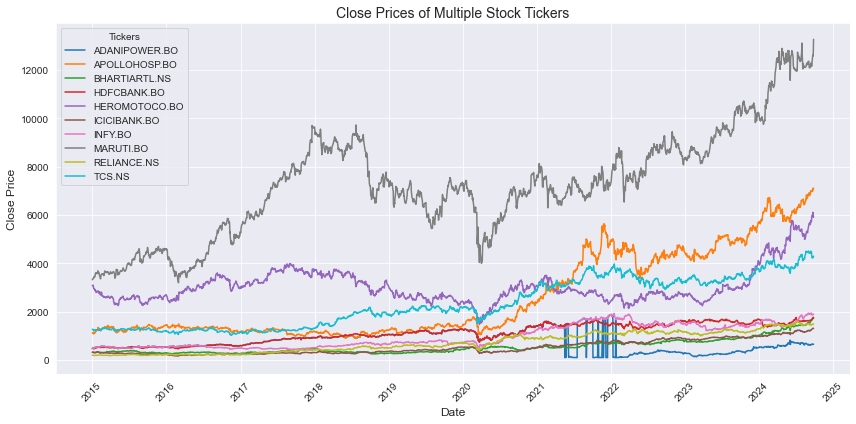

In [76]:
# Plotting
plt.figure(figsize=(12, 6))

for ticker in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10, loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

In [77]:
stock_data.loc[(stock_data['Ticker'] == 'ADANIPOWER.BO') , 'Ticker'] = np.nan


In [78]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker               2380
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [79]:
stock_data = stock_data.dropna(subset=['Ticker'])

In [80]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [81]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2404
RELIANCE.NS      2404
TCS.NS           2404
HDFCBANK.BO      2383
INFY.BO          2383
MARUTI.BO        2381
APOLLOHOSP.BO    2380
HEROMOTOCO.BO    2380
ICICIBANK.BO     2380
Name: Ticker, dtype: int64

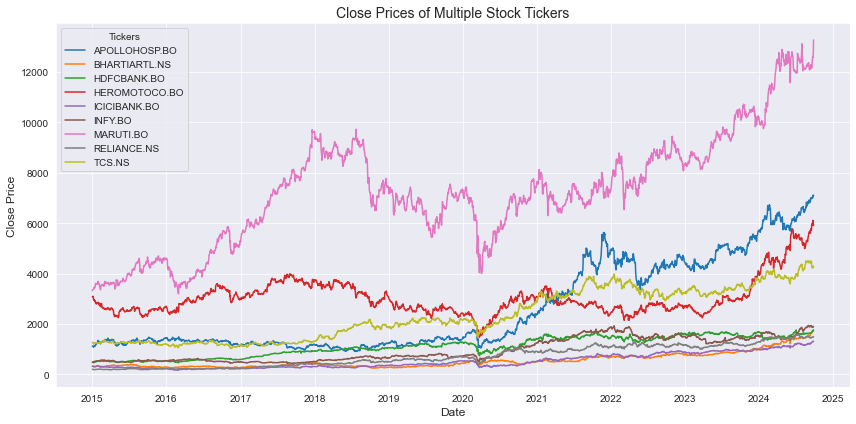

In [82]:
# Pivot data for plotting
pivot_df2 = stock_data.pivot(index='Date', columns='Ticker', values='Close')
# Ensure pivot_df has no NaN values
pivot_df2 = pivot_df2.fillna(method='ffill')  # Forward fill
# OR
# pivot_df = pivot_df.fillna(0)  # Replace NaN with 0

# Ensure data type is float
pivot_df2 = pivot_df2.astype(float)

# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df2.columns:
    plt.plot(pivot_df2.index, pivot_df2[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
# Numerical columns to check for outliers
stock_data_numerical_columns = stock_data.columns.drop(['Ticker', 'Date'])

# Remove outliers using the IQR method
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)  # First quartile
    Q3 = stock_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                           # Interquartile Range

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    stock_data = stock_data[(stock_data[column] >= lower_bound) & (stock_data[column] <= upper_bound)]

# Display the updated dataset
print("Outliers removed. Dataset shape:", stock_data.shape)


Outliers removed. Dataset shape: (13944, 8)


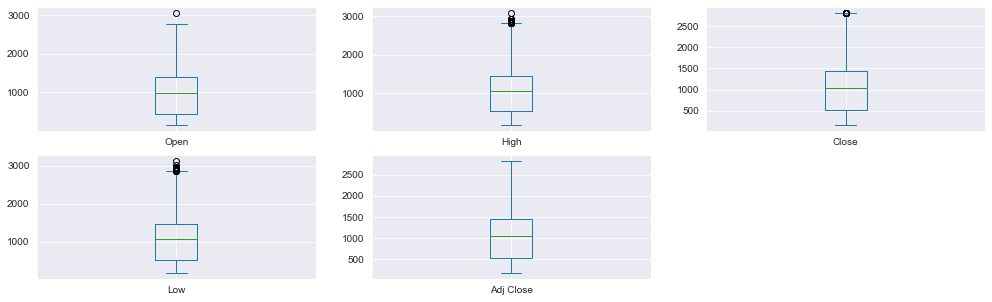

In [84]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

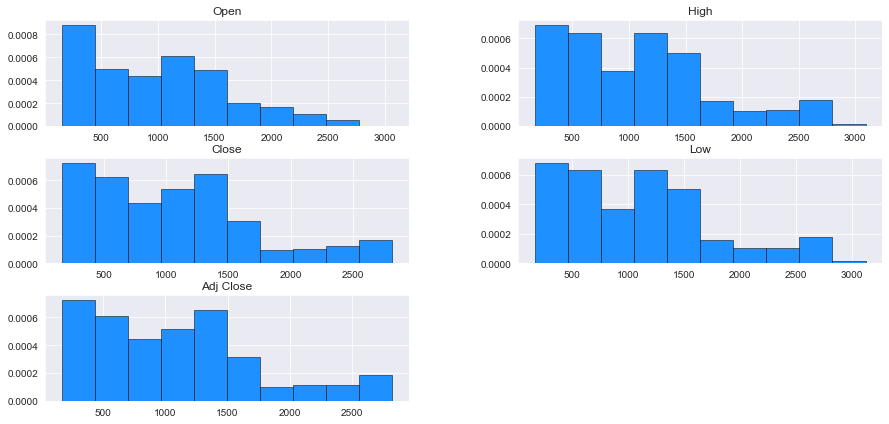

In [85]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

<AxesSubplot:>

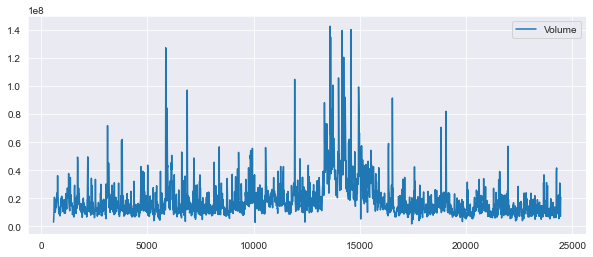

In [86]:
# Now let's plot the total volume of stock being traded each day over the past year

stock_data3['Volume'].plot(legend=True, figsize=(10,4))

In [87]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [88]:
# Check if the condition is true for all rows
is_valid = ((stock_data['Low'] <= stock_data['Open']) & 
            (stock_data['Open'] <= stock_data['High']) & 
            (stock_data['High'] <= stock_data['Close']))

# Verify if all rows satisfy the condition
if is_valid.all():
    print("All rows satisfy the condition: Low ≤ Open ≤ High ≤ Close.")
else:
    print("There are rows that do not satisfy the condition.")
    # Optional: Display the rows that fail the condition
    invalid_rows = stock_data[~is_valid]
    print("Invalid rows:")
    print(invalid_rows)


There are rows that do not satisfy the condition.
Invalid rows:
                           Date         Ticker  Open  High   Low  Close  \
584   2015-01-01 00:00:00+00:00  APOLLOHOSP.BO  1087  1126  1135   1120   
585   2015-01-01 00:00:00+00:00  BHARTIARTL.NS   311   327   329    317   
586   2015-01-01 00:00:00+00:00    HDFCBANK.BO   424   476   477    473   
588   2015-01-01 00:00:00+00:00   ICICIBANK.BO   295   321   323    318   
589   2015-01-01 00:00:00+00:00        INFY.BO   339   494   495    489   
...                         ...            ...   ...   ...   ...    ...   
24448 2024-09-26 00:00:00+00:00        INFY.BO  1878  1899  1917   1890   
24454 2024-09-27 00:00:00+00:00  BHARTIARTL.NS  1735  1735  1763   1722   
24455 2024-09-27 00:00:00+00:00    HDFCBANK.BO  1753  1753  1778   1750   
24457 2024-09-27 00:00:00+00:00   ICICIBANK.BO  1306  1306  1332   1303   
24458 2024-09-27 00:00:00+00:00        INFY.BO  1886  1907  1975   1903   

       Adj Close   Volume  
584    

In [89]:
# Identify invalid rows where the condition is not satisfied
invalid_rows = stock_data[(stock_data['Low'] > stock_data['Open']) | 
                          (stock_data['Open'] > stock_data['High']) | 
                          (stock_data['High'] > stock_data['Close'])]

print("Invalid rows before correction:")
print(invalid_rows)

# Correct invalid rows
for idx in invalid_rows.index:
    row = stock_data.loc[idx]
    # Enforce the logical condition: Low ≤ Open ≤ High ≤ Close
    low, open_, high, close = row['Low'], row['Open'], row['High'], row['Close']
    corrected_low = min(low, open_, high, close)
    corrected_high = max(low, open_, high, close)
    corrected_open = min(max(low, open_), corrected_high)
    corrected_close = min(max(corrected_open, close), corrected_high)

    # Update the row
    stock_data.at[idx, 'Low'] = corrected_low
    stock_data.at[idx, 'Open'] = corrected_open
    stock_data.at[idx, 'High'] = corrected_high
    stock_data.at[idx, 'Close'] = corrected_close

# Validate that all rows now satisfy the condition
is_valid = ((stock_data['Low'] <= stock_data['Open']) & 
            (stock_data['Open'] <= stock_data['High']) & 
            (stock_data['High'] <= stock_data['Close']))

if is_valid.all():
    print("All rows now satisfy the condition.")
else:
    print("There are still invalid rows.")
    print(stock_data[~is_valid])


Invalid rows before correction:
                           Date         Ticker  Open  High   Low  Close  \
584   2015-01-01 00:00:00+00:00  APOLLOHOSP.BO  1087  1126  1135   1120   
585   2015-01-01 00:00:00+00:00  BHARTIARTL.NS   311   327   329    317   
586   2015-01-01 00:00:00+00:00    HDFCBANK.BO   424   476   477    473   
588   2015-01-01 00:00:00+00:00   ICICIBANK.BO   295   321   323    318   
589   2015-01-01 00:00:00+00:00        INFY.BO   339   494   495    489   
...                         ...            ...   ...   ...   ...    ...   
24448 2024-09-26 00:00:00+00:00        INFY.BO  1878  1899  1917   1890   
24454 2024-09-27 00:00:00+00:00  BHARTIARTL.NS  1735  1735  1763   1722   
24455 2024-09-27 00:00:00+00:00    HDFCBANK.BO  1753  1753  1778   1750   
24457 2024-09-27 00:00:00+00:00   ICICIBANK.BO  1306  1306  1332   1303   
24458 2024-09-27 00:00:00+00:00        INFY.BO  1886  1907  1975   1903   

       Adj Close   Volume  
584         1135     3679  
585        

In [90]:
# Check if the condition is true for all rows
is_valid = ((stock_data['Low'] <= stock_data['Open']) & 
            (stock_data['Open'] <= stock_data['High']) & 
            (stock_data['High'] <= stock_data['Close']))

# Verify if all rows satisfy the condition
if is_valid.all():
    print("All rows satisfy the condition: Low ≤ Open ≤ High ≤ Close.")
else:
    print("There are rows that do not satisfy the condition.")
    # Optional: Display the rows that fail the condition
    invalid_rows = stock_data[~is_valid]
    print("Invalid rows:")
    print(invalid_rows)

All rows satisfy the condition: Low ≤ Open ≤ High ≤ Close.


In [91]:
stock_data.describe()

Open         High           Low        Close     Adj Close  \
count  13944.00000  13944.00000  13944.000000  13944.00000  13944.000000   
mean    1098.04224   1098.04224   1001.283348   1098.04224   1086.080752   
std      673.54338    673.54338    598.536250    673.54338    665.393234   
min      169.00000    169.00000    156.000000    169.00000    168.000000   
25%      528.00000    528.00000    436.000000    528.00000    522.000000   
50%     1058.00000   1058.00000    987.500000   1058.00000   1046.500000   
75%     1462.00000   1462.00000   1394.000000   1462.00000   1448.000000   
max     3125.00000   3125.00000   2761.000000   3125.00000   2823.000000   

             Volume  
count  1.394400e+04  
mean   1.939393e+06  
std    2.887414e+06  
min    9.640000e+02  
25%    1.327155e+05  
50%    4.901235e+05  
75%    2.526928e+06  
max    1.215439e+07

In [92]:
stock_data.corr()   

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  1.000000  0.989193  1.000000   0.999722 -0.258441
High       1.000000  1.000000  0.989193  1.000000   0.999722 -0.258441
Low        0.989193  0.989193  1.000000  0.989193   0.989016 -0.245635
Close      1.000000  1.000000  0.989193  1.000000   0.999722 -0.258441
Adj Close  0.999722  0.999722  0.989016  0.999722   1.000000 -0.258701
Volume    -0.258441 -0.258441 -0.245635 -0.258441  -0.258701  1.000000

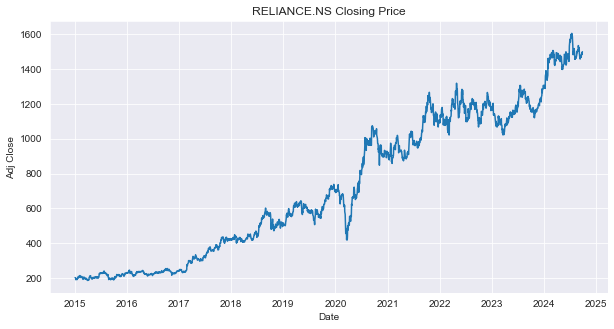

In [93]:
# plot lineplot
stock = 'RELIANCE.NS'
plt.figure(figsize = (10,5))
sns.lineplot(data = stock_data3,x='Date',y='Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

<AxesSubplot:>

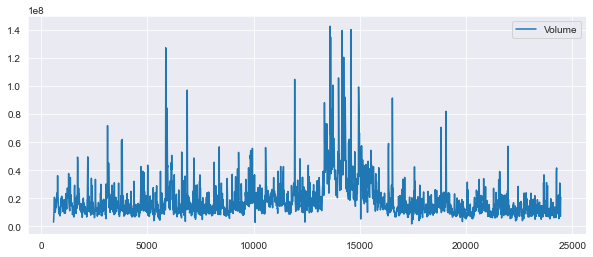

In [94]:
stock_data3['Volume'].plot(legend=True,figsize=(10,4))

In [95]:
Tech_list=stock_data["Ticker"].unique()
Tech_list

array(['APOLLOHOSP.BO', 'BHARTIARTL.NS', 'HDFCBANK.BO', 'ICICIBANK.BO',
       'INFY.BO', 'RELIANCE.NS', 'TCS.NS', 'HEROMOTOCO.BO'], dtype=object)

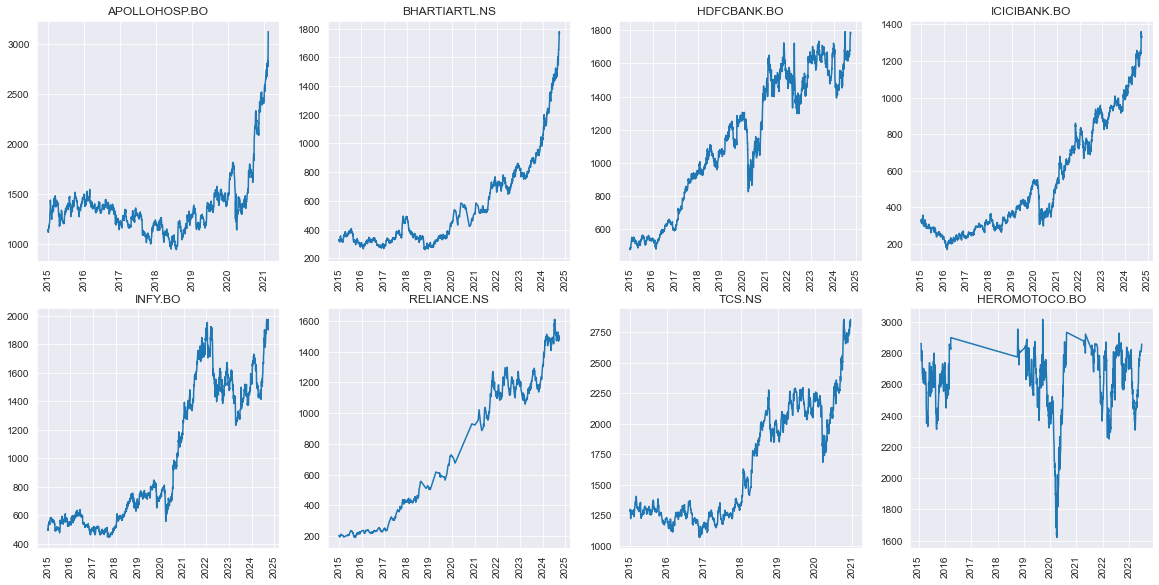

In [96]:
plt.figure(figsize=(20,15))
for i, company in enumerate(Tech_list,1):
    plt.subplot(3,4,i)
    plt.title(company)
    df=stock_data[stock_data["Ticker"]== company]
    plt.plot(df["Date"], df["Close"])
    plt.xticks(rotation="vertical")

In [97]:
import plotly.express as px
for comapny in Tech_list:
    df= stock_data[stock_data["Ticker"]== company]
    plot=px.line(df,x="Date",y= "Volume",title=comapny)
    plot.show()

In [98]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close  \
591 2015-01-01 00:00:00+00:00  RELIANCE.NS   182   203  204    202        203   
601 2015-01-02 00:00:00+00:00  RELIANCE.NS   182   202  205    202        203   
611 2015-01-05 00:00:00+00:00  RELIANCE.NS   180   200  204    200        202   
621 2015-01-06 00:00:00+00:00  RELIANCE.NS   172   191  200    190        199   
631 2015-01-07 00:00:00+00:00  RELIANCE.NS   176   195  196    191        191   

       Volume  
591   2963643  
601   7331366  
611  10103941  
621  18627980  
631  20720312

In [99]:
col=['Open','Close','Low','High','Adj Close']
stock_data3[col] = stock_data3[col].astype(float)

In [100]:
stock_data3["Daily price change"]= stock_data3["Close"]-stock_data3["Open"]

In [101]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  \
591 2015-01-01 00:00:00+00:00  RELIANCE.NS  182.0  203.0  204.0  202.0   
601 2015-01-02 00:00:00+00:00  RELIANCE.NS  182.0  202.0  205.0  202.0   
611 2015-01-05 00:00:00+00:00  RELIANCE.NS  180.0  200.0  204.0  200.0   
621 2015-01-06 00:00:00+00:00  RELIANCE.NS  172.0  191.0  200.0  190.0   
631 2015-01-07 00:00:00+00:00  RELIANCE.NS  176.0  195.0  196.0  191.0   

     Adj Close    Volume  Daily price change  
591      203.0   2963643                20.0  
601      203.0   7331366                20.0  
611      202.0  10103941                20.0  
621      199.0  18627980                18.0  
631      191.0  20720312                15.0

In [102]:
stock_data3["% daily price change"]= ((stock_data3["Daily price change"])/stock_data3["Close"])*100

In [103]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  \
591 2015-01-01 00:00:00+00:00  RELIANCE.NS  182.0  203.0  204.0  202.0   
601 2015-01-02 00:00:00+00:00  RELIANCE.NS  182.0  202.0  205.0  202.0   
611 2015-01-05 00:00:00+00:00  RELIANCE.NS  180.0  200.0  204.0  200.0   
621 2015-01-06 00:00:00+00:00  RELIANCE.NS  172.0  191.0  200.0  190.0   
631 2015-01-07 00:00:00+00:00  RELIANCE.NS  176.0  195.0  196.0  191.0   

     Adj Close    Volume  Daily price change  % daily price change  
591      203.0   2963643                20.0              9.900990  
601      203.0   7331366                20.0              9.900990  
611      202.0  10103941                20.0             10.000000  
621      199.0  18627980                18.0              9.473684  
631      191.0  20720312                15.0              7.853403

In [104]:
plot=px.line(stock_data3, x="Date", y="% daily price change", title= "RELIANCE.NS")
plot.show()

<AxesSubplot:>

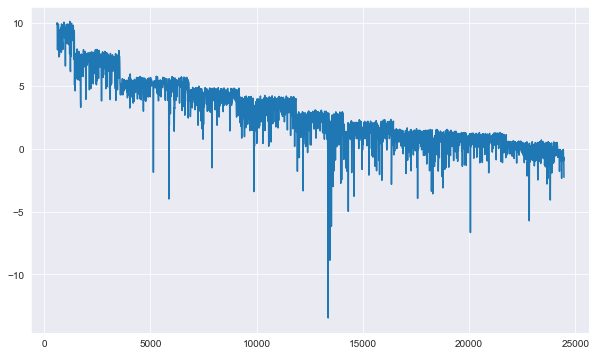

In [105]:
plt.figure(figsize=(10,6))
stock_data3['% daily price change'].plot()

In [106]:
import plotly.express as px
fig = px.line(stock_data3, x="Date", y="% daily price change", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

In [107]:
stock_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 591 to 24460
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Date                  2404 non-null   datetime64[ns, UTC]
 1   Ticker                2404 non-null   object             
 2   Open                  2404 non-null   float64            
 3   High                  2404 non-null   float64            
 4   Low                   2404 non-null   float64            
 5   Close                 2404 non-null   float64            
 6   Adj Close             2404 non-null   float64            
 7   Volume                2404 non-null   Int64              
 8   Daily price change    2404 non-null   float64            
 9   % daily price change  2404 non-null   float64            
dtypes: Int64(1), datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 208.9+ KB


<AxesSubplot:xlabel='Date'>

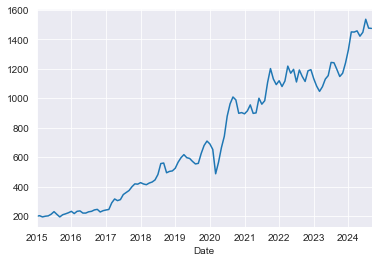

In [108]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data3['Date'] = pd.to_datetime(stock_data3['Date'])

# Set 'Date' as the index
stock_data3.set_index('Date', inplace=True)

# Now you can resample by month and plot the mean of 'Close' prices
stock_data3['Close'].resample('M').mean().plot()


<AxesSubplot:xlabel='Date'>

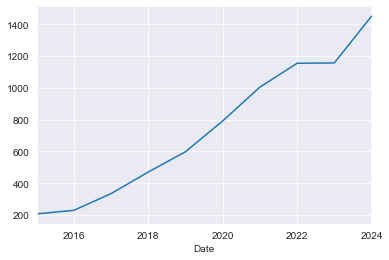

In [109]:
stock_data3['Close'].resample('Y').mean().plot()

In [110]:
# Extract 'Ticker' and 'Close' columns
close_prices = stock_data[['Ticker', 'Close']]

# Pivot the DataFrame to make Tickers the columns
close_prices= close_prices.pivot(columns='Ticker', values='Close')

In [111]:
close_prices.head()

Ticker  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  HEROMOTOCO.BO  \
584              1135           <NA>         <NA>           <NA>   
585              <NA>            329         <NA>           <NA>   
586              <NA>           <NA>          477           <NA>   
588              <NA>           <NA>         <NA>           <NA>   
589              <NA>           <NA>         <NA>           <NA>   

Ticker  ICICIBANK.BO  INFY.BO  RELIANCE.NS  TCS.NS  
584             <NA>     <NA>         <NA>    <NA>  
585             <NA>     <NA>         <NA>    <NA>  
586             <NA>     <NA>         <NA>    <NA>  
588              323     <NA>         <NA>    <NA>  
589             <NA>      495         <NA>    <NA>

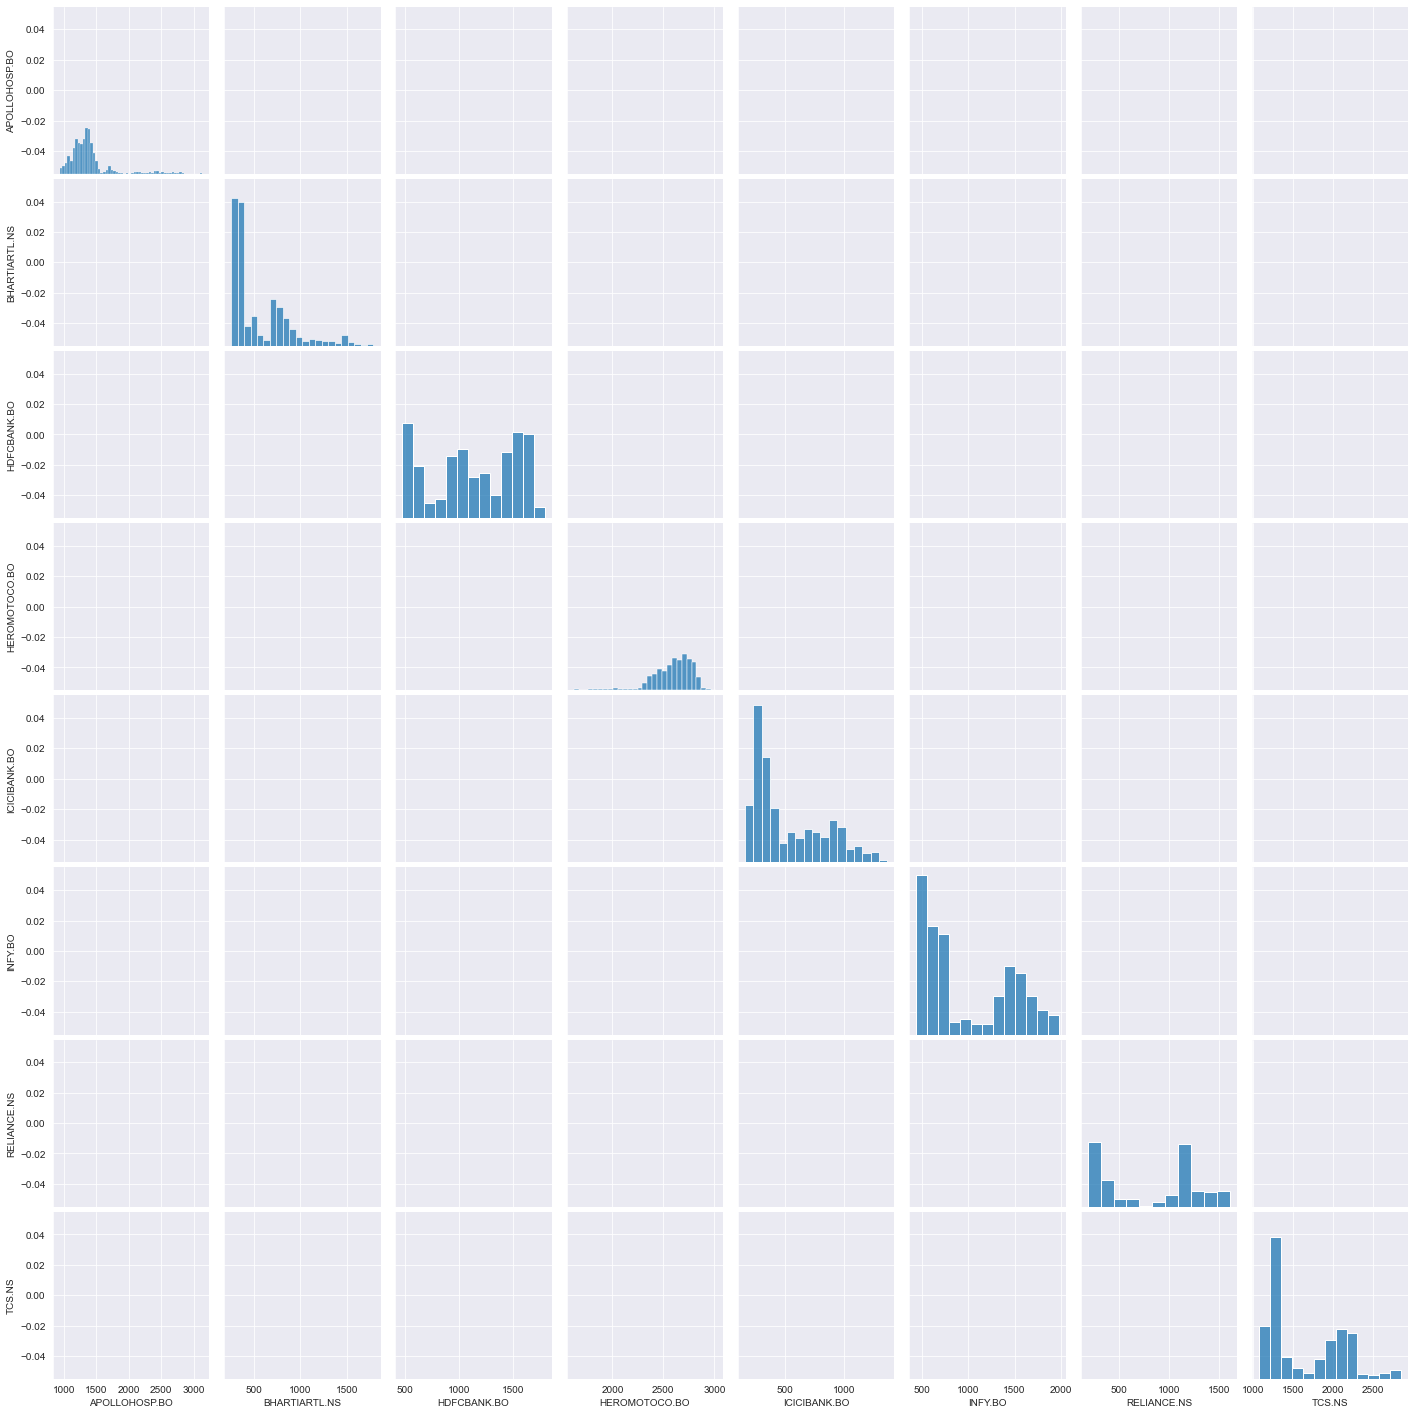

In [112]:
sns.pairplot(data=close_prices)

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

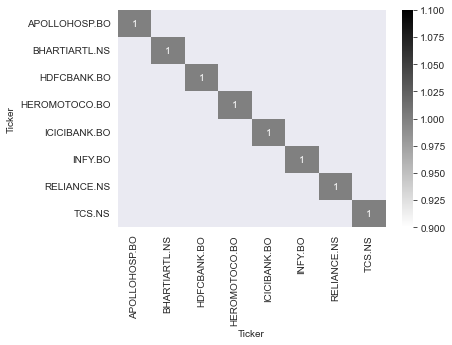

In [113]:
sns.heatmap(close_prices.corr(),annot=True,cmap='gray_r',linecolor="black")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2015-12-31 00:00:00+00:00'),
  Text(1, 0, '2016-12-31 00:00:00+00:00'),
  Text(2, 0, '2017-12-31 00:00:00+00:00'),
  Text(3, 0, '2018-12-31 00:00:00+00:00'),
  Text(4, 0, '2019-12-31 00:00:00+00:00'),
  Text(5, 0, '2020-12-31 00:00:00+00:00'),
  Text(6, 0, '2021-12-31 00:00:00+00:00'),
  Text(7, 0, '2022-12-31 00:00:00+00:00'),
  Text(8, 0, '2023-12-31 00:00:00+00:00'),
  Text(9, 0, '2024-12-31 00:00:00+00:00')])

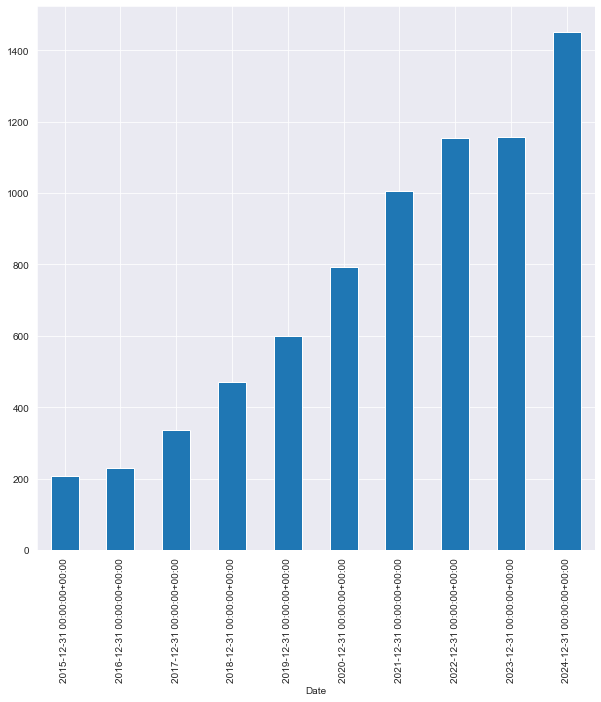

In [114]:
plt.figure(figsize=(10,10))
stock_data3['Close'].resample("Y").mean().plot(kind="bar")
plt.xticks(rotation="vertical")

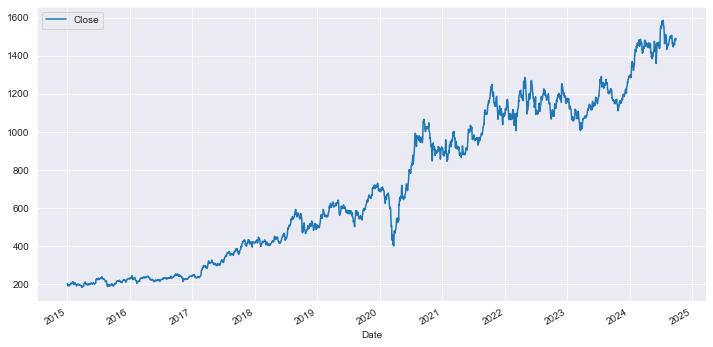

In [126]:
# Let's see a historical view of the closing price
stock_data3['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

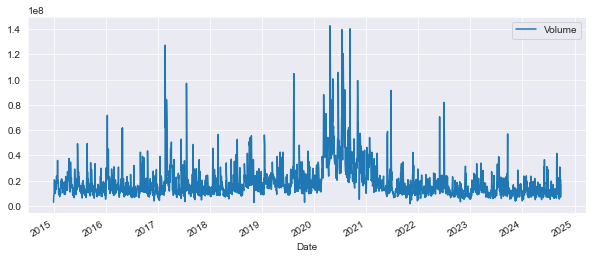

In [127]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
stock_data3['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [129]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data3[column_name]=pd.DataFrame.rolling(stock_data3['Close'],ma).mean()

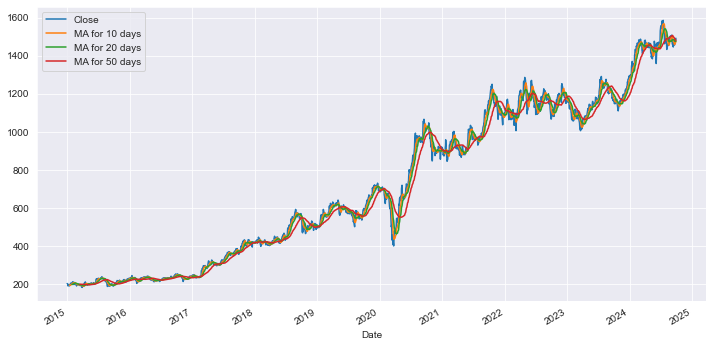

In [130]:
stock_data3[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

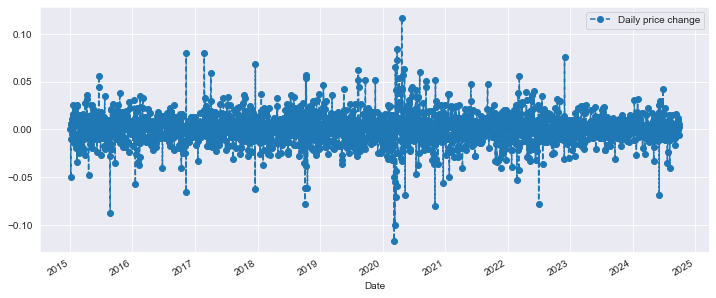

In [131]:
# use pct_change to find the percent change for each day
stock_data3['Daily price change'] =  stock_data3['Close'].pct_change()
# plot the daily return percentage
stock_data3['Daily price change'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()